# *Importación de Librerías*

In [1]:
import pandas as pd
import warnings
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# *Carga de datos*


In [2]:
#Archivo ya previamente con mejorías del proyecto 2
archivo = pd.read_csv('/content/datos_tratados.csv')


In [3]:
archivo.sample(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,account_Charges_Daily
591,0841-NULXI,1.0,Male,0,0,0,1,0,0,DSL,...,0,0,0,1,Month-to-month,1,Electronic check,35.55,35.55,1.185
2958,4109-CYRBD,0.0,Male,1,1,0,29,1,1,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,51.60,1442.00,1.720


In [4]:
#Cambiar columna Churn de tipo float64 a int64
archivo['Churn'] = archivo['Churn'].fillna(0).astype('int64')

In [5]:
archivo.head(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,account_Charges_Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667


# Eliminar columnas *innecesarias*

In [6]:
#customerID, es una identificación de cada usuario, para el módelo totalmente innecesario.
#account_Charges_Daily,es una división de la columna account_Charges_Monthly.
#Por ende account_Charges_Daily se elimina, al momento de aplicar correlación tiene la misma data que account_Charges_Monthly.
archivo = archivo.drop(['customerID', 'account_Charges_Daily'], axis=1)

In [7]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   int64  
 1   customer_gender            7267 non-null   object 
 2   customer_SeniorCitizen     7267 non-null   int64  
 3   customer_Partner           7267 non-null   int64  
 4   customer_Dependents        7267 non-null   int64  
 5   customer_tenure            7267 non-null   int64  
 6   phone_PhoneService         7267 non-null   int64  
 7   phone_MultipleLines        7267 non-null   int64  
 8   internet_InternetService   7267 non-null   object 
 9   internet_OnlineSecurity    7267 non-null   int64  
 10  internet_OnlineBackup      7267 non-null   int64  
 11  internet_DeviceProtection  7267 non-null   int64  
 12  internet_TechSupport       7267 non-null   int64  
 13  internet_StreamingTV       7267 non-null   int64

# *Modificar tipo de columnas*

In [8]:
#Librería manejo de advertencias.
warnings.filterwarnings('ignore')


In [9]:
archivo['customer_gender'].value_counts()


,count
customer_gender,
Male,3675
Female,3592


In [10]:
#Se hará la modificación de las 4 columnas de tipo object a int64
archivo['customer_gender'] = archivo['customer_gender'].replace({'Male': 0, 'Female': 1})

In [11]:
archivo['internet_InternetService'].value_counts()

,count
internet_InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [12]:
archivo['internet_InternetService'] =  archivo['internet_InternetService'].replace({'Fiber optic': 0, 'DSL': 1, 'No': 2})

In [13]:
archivo['account_Contract'].value_counts()

,count
account_Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [14]:
archivo['account_Contract'] = archivo['account_Contract'].replace({'Month-to-month': 0, 'Two year': 1, 'One year': 2})

In [15]:
archivo['account_PaymentMethod'].value_counts()

,count
account_PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [16]:
archivo['account_PaymentMethod'] = archivo['account_PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [17]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   int64  
 1   customer_gender            7267 non-null   int64  
 2   customer_SeniorCitizen     7267 non-null   int64  
 3   customer_Partner           7267 non-null   int64  
 4   customer_Dependents        7267 non-null   int64  
 5   customer_tenure            7267 non-null   int64  
 6   phone_PhoneService         7267 non-null   int64  
 7   phone_MultipleLines        7267 non-null   int64  
 8   internet_InternetService   7267 non-null   int64  
 9   internet_OnlineSecurity    7267 non-null   int64  
 10  internet_OnlineBackup      7267 non-null   int64  
 11  internet_DeviceProtection  7267 non-null   int64  
 12  internet_TechSupport       7267 non-null   int64  
 13  internet_StreamingTV       7267 non-null   int64

# *Correlación y variables númericas*

In [18]:
#Creación variable dependiente e independiente
X = archivo.drop('Churn', axis= 1)
y = archivo['Churn']

In [19]:
#Revisando que la data tenga tipo númerico(int64, float64)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_gender            7267 non-null   int64  
 1   customer_SeniorCitizen     7267 non-null   int64  
 2   customer_Partner           7267 non-null   int64  
 3   customer_Dependents        7267 non-null   int64  
 4   customer_tenure            7267 non-null   int64  
 5   phone_PhoneService         7267 non-null   int64  
 6   phone_MultipleLines        7267 non-null   int64  
 7   internet_InternetService   7267 non-null   int64  
 8   internet_OnlineSecurity    7267 non-null   int64  
 9   internet_OnlineBackup      7267 non-null   int64  
 10  internet_DeviceProtection  7267 non-null   int64  
 11  internet_TechSupport       7267 non-null   int64  
 12  internet_StreamingTV       7267 non-null   int64  
 13  internet_StreamingMovies   7267 non-null   int64

In [20]:
X.head(2)

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,1,0,1,1,9,1,0,1,0,1,0,1,1,0,2,1,1,65.6,593.3
1,0,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,1,59.9,542.4


In [21]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 56.9 KB


In [22]:
y.head(2)

,Churn
0,0
1,0


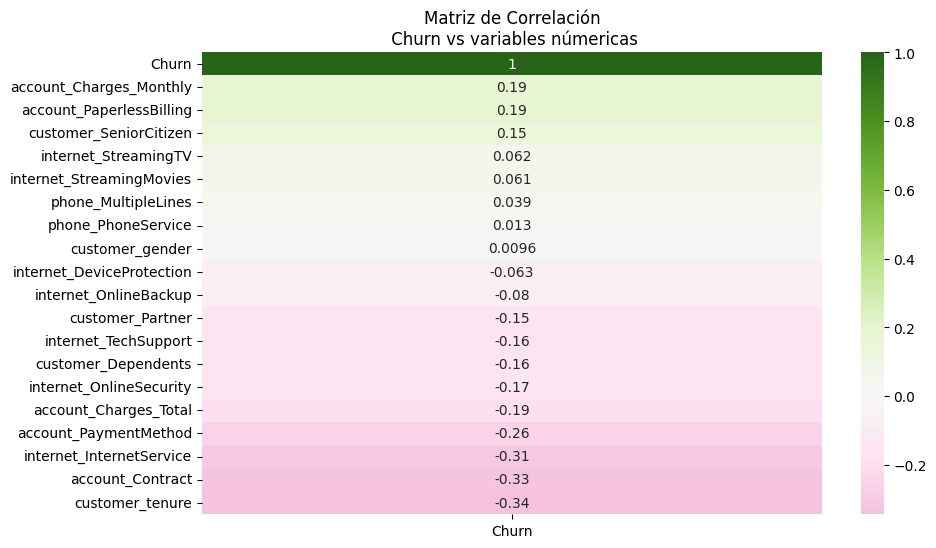

In [23]:
variable_numerica = archivo.select_dtypes(include = ['int64', 'float64'])
#crear matriz correlación
matriz_corr = variable_numerica.corr()

plt.figure(figsize=(10, 6))

#Crear un mapa de calor(propuesto por la ia) desarrollando correlación de los datos númericos vs el churn.
# Tomando en cuenta valores positivos y negativos.
sns.heatmap(matriz_corr[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='PiYG', center= 0)
plt.title('Matriz de Correlación\n Churn vs variables númericas')
plt.show()

# *Explicación del Mapa de calor*

 Se aprecia valores positivos llegando al cero y posteriormente a valores negativos:


---


 Los valores positivos representan la posibilidad que el usuario deje el servicio.

*   account_Charges_Monthly 0.19
*   account_PaperlessBilling 0.19
*   customer_SeniorCitizen 0.15
*   internet_StreamingTV 0.062
*   internet_StreamingMovies 0.061

Los valores negativos representan la fidelidad del usuario con el servicio

*   customer_tenure -0.34
*   account_Contract -0.33
*   internet_InternetService -0.31
*   account_PaymentMethod -0.26
*   account_Charges_Total -0.19
*   internet_OnlineSecurity -0.17
*   customer_Dependents -0.16
*   internet_TechSupport -0.16
*   customer_Partner -0.15





# *Identificando posibles últimos errores y corregirlos*

In [24]:
#Valores Infinitos
print(np.isinf(X).sum())

customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [25]:
#Valores Nulos
print(X.isna().sum())

customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64


In [26]:
print((X == '' ).sum())

customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [27]:
print((X == ' ' ).sum())

customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [28]:
print(X.dtypes)

customer_gender                int64
customer_SeniorCitizen         int64
customer_Partner               int64
customer_Dependents            int64
customer_tenure                int64
phone_PhoneService             int64
phone_MultipleLines            int64
internet_InternetService       int64
internet_OnlineSecurity        int64
internet_OnlineBackup          int64
internet_DeviceProtection      int64
internet_TechSupport           int64
internet_StreamingTV           int64
internet_StreamingMovies       int64
account_Contract               int64
account_PaperlessBilling       int64
account_PaymentMethod          int64
account_Charges_Monthly      float64
account_Charges_Total        float64
dtype: object


In [29]:
#Arreglar últimos detalles.
X['account_Charges_Total'] = X['account_Charges_Total'].fillna(0)
print(X.isna().sum())

customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


# *Identificar el tipo de modelo con el que se trabajará*

Entendiendo que la variable Churn es de tipo binaria, el tipo de modelo es de clasificación binaria. Que está categorizado por 0 y 1.

---
Tipos modelos clasificación


---


*   Regresión Logística
*   Árbol de decisión
*   KNN
*   SVM
*   Random Forest Classifier






# *Exacititud de Modelos*

In [30]:
#Comienza la utilización de la libreria sklearn en su apartado train_test_split
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

# *Evaluación de la exactitud(accuracy)  por cada modelo*

Logistic Regression

In [31]:
#Primer modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
modelo_logistic_regression = LogisticRegression()
modelo_logistic_regression.fit(X_train, y_train)
modelo_logistic_regression.score(X_test, y_test)

0.8139321723189734

Árbol Decisión

In [32]:
#Segundo Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
modelo_decision_tree = DecisionTreeClassifier()
modelo_decision_tree.fit(X_train, y_train)
modelo_decision_tree.score(X_test, y_test)

0.7442713107241063

Modelo KNN

In [33]:
#Tercer modelo KNN
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train, y_train)
modelo_knn.score(X_test, y_test)


0.7571035747021082

Modelo SVC(Suport Vector Classifier)

In [34]:
#Cuarto modelo SVC
from sklearn.svm import SVC
modelo_svc = SVC()
modelo_svc.fit(X_train, y_train)
modelo_svc.score(X_test, y_test)


0.7424381301558204

Modelo Random Forest Classifier

In [35]:
#Quinto modelo Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(X_train, y_train)
modelo_random_forest.score(X_test, y_test)

0.7873510540788268

# *Comparación de la exactitud entre modelos*

In [36]:
lista_modelos = [('LogisticRegression', modelo_logistic_regression, X_test),
                 ('Tree', modelo_decision_tree, X_test),
                 ('KNN', modelo_knn, X_test),
                 ('SVC', modelo_svc, X_test),
                 ('RandomForest', modelo_random_forest, X_test)
                 ]
for i in lista_modelos:
  print(f'Exactitud del modelo {i[0]}: {i[1].score(i[2], y_test)}')

Exactitud del modelo LogisticRegression: 0.8139321723189734
Exactitud del modelo Tree: 0.7442713107241063
Exactitud del modelo KNN: 0.7571035747021082
Exactitud del modelo SVC: 0.7424381301558204
Exactitud del modelo RandomForest: 0.7873510540788268


La primera comparación entre modelos da que Logistic Regression tiene mejor exactitud.


---
La conclusión rápida sería adpotar este modelo para el analisis, pero se necesita constrastar con otros mecanismos que se realizar a continuación.


# *Validación de Modelos*

*Obtención del dato de entrenamiento y dato de Validación.*

In [37]:
modelo1 = LogisticRegression()
modelo1.fit(X_train, y_train)
print(f'Modelo1 entrenamiento: {modelo1.score(X_train, y_train)}')
print(f'Modelo1 validación: {modelo1.score(X_val, y_val)}')

Modelo1 entrenamiento: 0.8044041450777202
Modelo1 validación: 0.7998704663212435


In [38]:
modelo2 = DecisionTreeClassifier(max_depth=10)
modelo2.fit(X_train, y_train)
print(f'Modelo2 entrenamiento: {modelo2.score(X_train, y_train)}')
print(f'Modelo2 validación: {modelo2.score(X_val, y_val)}')

Modelo2 entrenamiento: 0.8758635578583766
Modelo2 validación: 0.7791450777202072


In [39]:
modelo3 = KNeighborsClassifier()
modelo3.fit(X_train, y_train)
print(f'Modelo3 entrenamiento: {modelo3.score(X_train, y_train)}')
print(f'Modelo3 validación: {modelo3.score(X_val, y_val)}')

Modelo3 entrenamiento: 0.8303108808290155
Modelo3 validación: 0.7512953367875648


In [40]:
modelo4 = SVC(class_weight='balanced')
modelo4.fit(X_train, y_train)
print(f'Modelo4 entrenamiento: {modelo4.score(X_train, y_train)}')
print(f'Modelo4 validación: {modelo4.score(X_val, y_val)}')

Modelo4 entrenamiento: 0.6614853195164075
Modelo4 validación: 0.6632124352331606


In [41]:
modelo5 = RandomForestClassifier()
modelo5.fit(X_train, y_train)
print(f'Modelo5 entrenamiento: {modelo5.score(X_train, y_train)}')
print(f'Modelo5 validación: {modelo5.score(X_val, y_val)}')

Modelo5 entrenamiento: 0.9926597582037997
Modelo5 validación: 0.7927461139896373


La tendencia que se apreciaba en la exactitud se corrobora en la validación dando el modelo Logistic Regression muy buena data

---

Con una buena curva de aprendizaje.

# *Evaluación Modelos(Matriz de Confusión)*

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Recordar modelo1 es LogisticRegression

y_pred1 = modelo1.predict(X_test)
print(f'La exactitud en el modelo1: {accuracy_score(y_test, y_pred1):.4f}')
print(f'La precisión en el modelo1: {precision_score(y_test, y_pred1):.4f}')
print(f'La sensibilidad en el modelo1: {recall_score(y_test, y_pred1):.4f}')
print(f'f1 Score en el modelo1: {f1_score(y_test, y_pred1):.4f}')

La exactitud en el modelo1: 0.8139
La precisión en el modelo1: 0.6840
La sensibilidad en el modelo1: 0.5160
f1 Score en el modelo1: 0.5882


In [43]:
#Modelo2 DecisionTreeClassifier
y_pred2 = modelo2.predict(X_test)
print(f'La excatitud en el modelo2: {accuracy_score(y_test, y_pred2):.4f}')
print(f'La precisión en el modelo2: {precision_score(y_test, y_pred2):.4f}')
print(f'La sensibilidad en el modelo2: {recall_score(y_test, y_pred2):.4f}')
print(f'f1 Score en el modelo2: {f1_score(y_test, y_pred2):.4f}')


La excatitud en el modelo2: 0.7699
La precisión en el modelo2: 0.5586
La sensibilidad en el modelo2: 0.5089
f1 Score en el modelo2: 0.5326


In [44]:
#Modelo3 KNN
y_pred3 = modelo3.predict(X_test)
print(f'La excatitud en el modelo3 es: {accuracy_score(y_test, y_pred3):.4f}')
print(f'La precisión en el modelo3 es: {precision_score(y_test, y_pred3):.4f}')
print(f'La sensibilidad en el modelo3 es: {recall_score(y_test, y_pred3):.4f}')
print(f'La f1 Score en el modelo3 es: {f1_score(y_test, y_pred3):.4f}')

La excatitud en el modelo3 es: 0.7571
La precisión en el modelo3 es: 0.5404
La sensibilidad en el modelo3 es: 0.3808
La f1 Score en el modelo3 es: 0.4468


In [45]:
#Modelo4 SVC
y_pred4 = modelo4.predict(X_test)
print(f'La excatitud en el modelo4 es: {accuracy_score(y_test, y_pred4):.4f}')
print(f'La precisión en el modelo4 es: {precision_score(y_test, y_pred4):.4f}')
print(f'La sensibilidad en el modelo4 es: {recall_score(y_test, y_pred4):.4f}')
print(f'La f1 Score en el modelo4 es: {f1_score(y_test, y_pred4):.4f}')

La excatitud en el modelo4 es: 0.6581
La precisión en el modelo4 es: 0.3883
La sensibilidad en el modelo4 es: 0.5694
La f1 Score en el modelo4 es: 0.4618


In [46]:
#Modelo5 Random Forest Classifier
y_pred5 = modelo5.predict(X_test)
print(f'La excatitud en el modelo5 es: {accuracy_score(y_test, y_pred5):.4f}')
print(f'La precisión en el modelo5 es: {precision_score(y_test, y_pred5):.4f}')
print(f'La sensibilidad en el modelo5 es: {recall_score(y_test, y_pred5):.4f}')
print(f'La f1 Score en el modelo5 es: {f1_score(y_test, y_pred5):.4f}')

La excatitud en el modelo5 es: 0.7819
La precisión en el modelo5 es: 0.6029
La sensibilidad en el modelo5 es: 0.4484
La f1 Score en el modelo5 es: 0.5143


*Desarrollar tabla que identifique de manera más optima los datos obtenidos*


---



In [47]:
accuracy_data = [accuracy_score(y_test, y_pred1),
                 accuracy_score(y_test, y_pred2),
                 accuracy_score(y_test, y_pred3),
                 accuracy_score(y_test, y_pred4),
                 accuracy_score(y_test, y_pred5)]

accuracy_data = [f'{score:.4f}' for score in accuracy_data]
print(accuracy_data)

['0.8139', '0.7699', '0.7571', '0.6581', '0.7819']


In [48]:
precision_data = [precision_score(y_test, y_pred1),
                  precision_score(y_test, y_pred2),
                  precision_score(y_test, y_pred3),
                  precision_score(y_test, y_pred4),
                  precision_score(y_test, y_pred5)
                  ]
precision_data = [f'{score:.4f}' for score in precision_data]
print(precision_data)

['0.6840', '0.5586', '0.5404', '0.3883', '0.6029']


In [49]:
recall_data = [recall_score(y_test, y_pred1),
               recall_score(y_test, y_pred2),
               recall_score(y_test, y_pred3),
               recall_score(y_test, y_pred4),
               recall_score(y_test, y_pred5)
               ]
recall_data = [f'{score:.4f}' for score in recall_data]
print(recall_data)

['0.5160', '0.5089', '0.3808', '0.5694', '0.4484']


In [50]:
f1_score_data = [f1_score(y_test, y_pred1),
                 f1_score(y_test, y_pred2),
                 f1_score(y_test, y_pred3),
                 f1_score(y_test, y_pred4),
                 f1_score(y_test, y_pred5)
                 ]
f1_score_data = [f'{score:.4f}' for score in f1_score_data]
print(f1_score_data)

['0.5882', '0.5326', '0.4468', '0.4618', '0.5143']


In [51]:
data_received = {
    'Modelo': [
        'LogisticRegression',
        'DecisionTreeClassifier',
        'KNeighborsClassifier',
        'SVC',
        'RandomForestClassifier'
    ],
    'Accuracy': accuracy_data,
    'Precision': precision_data,
    'Recall': recall_data,
    'F1_score': f1_score_data
}

df_matrix = pd.DataFrame(data_received)
df_matrix


,Modelo,Accuracy,Precision,Recall,F1_score
0,LogisticRegression,0.8139,0.6840,0.5160,0.5882
1,DecisionTreeClassifier,0.7699,0.5586,0.5089,0.5326
2,KNeighborsClassifier,0.7571,0.5404,0.3808,0.4468
3,SVC,0.6581,0.3883,0.5694,0.4618
4,RandomForestClassifier,0.7819,0.6029,0.4484,0.5143


Se puede concluír que el modelo Logistic Regression tiene las mejores metricas. Estable y fácil de interpretar.

Matriz de Confusión

In [52]:
from sklearn.metrics import confusion_matrix
y_provided = modelo1.predict(X_val)
matrix_confusion1 = confusion_matrix(y_val, y_provided)
print(matrix_confusion1)

[[1033  114]
 [ 195  202]]


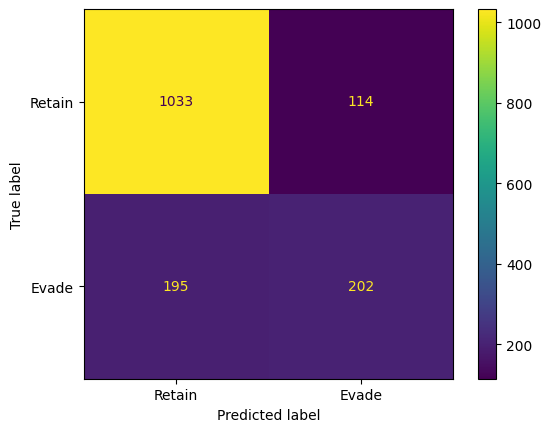

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
print_display = ConfusionMatrixDisplay(confusion_matrix=matrix_confusion1, display_labels=['Retain','Evade'])
print_display.plot()

Curva Roc


---
Sensibilidad(verdaderos positivos) vs Especificidad(falsos negativos)


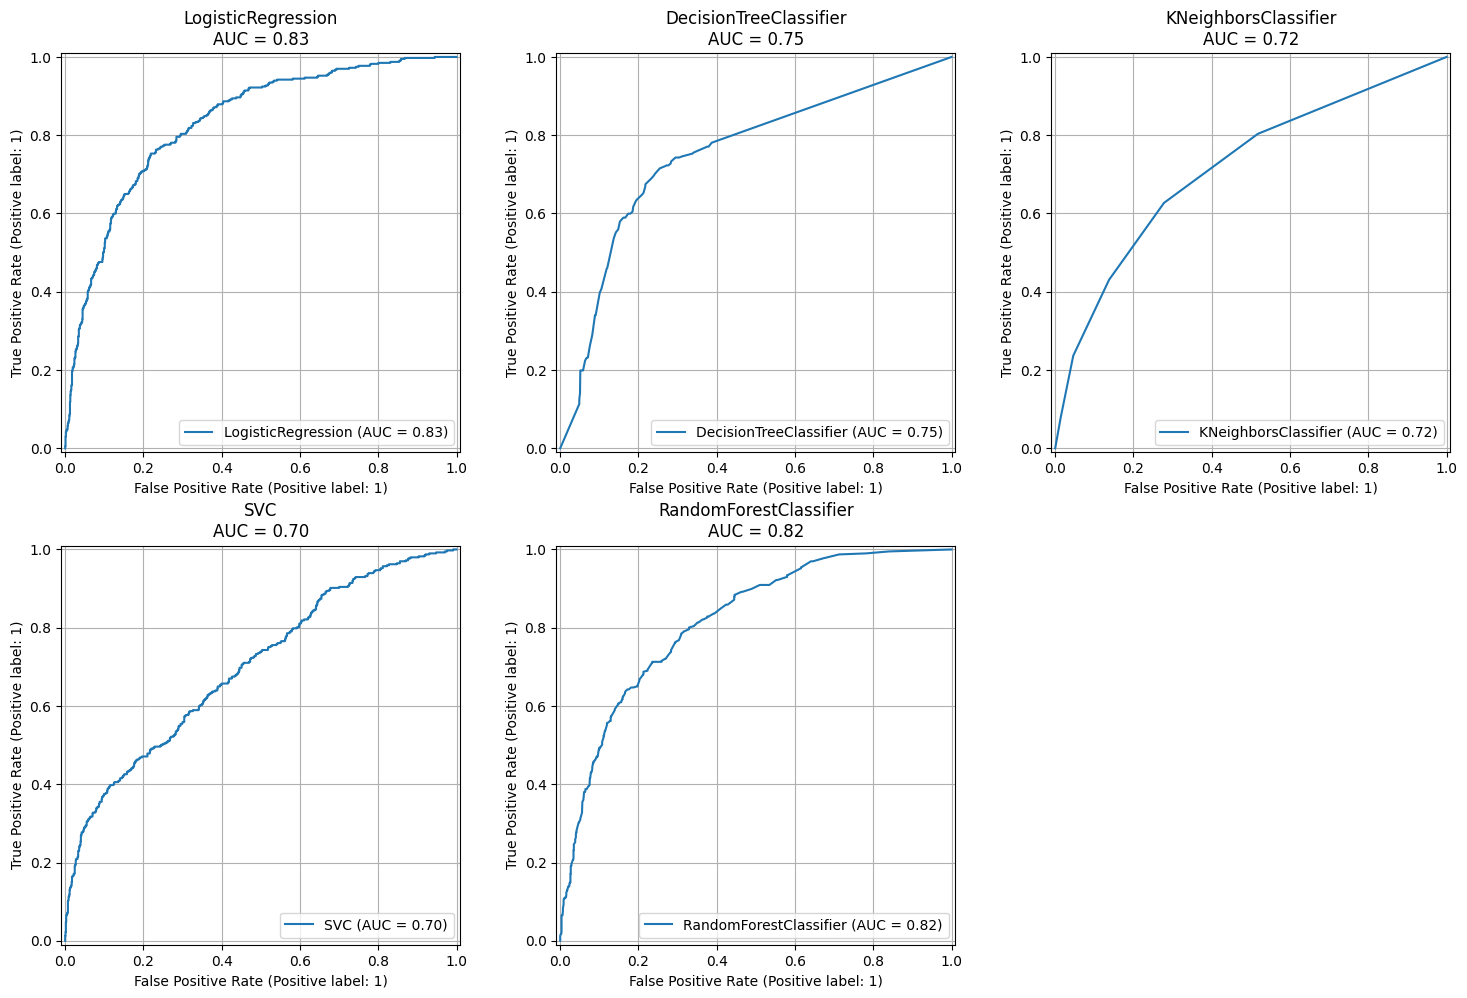

In [54]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
model_name = [
    ('LogisticRegression', modelo1),
    ('DecisionTreeClassifier', modelo2),
    ('KNeighborsClassifier', modelo3),
    ('SVC', modelo4),
    ('RandomForestClassifier', modelo5)
    ]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(model_name):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(model, "predict_proba"):
        predict_probas = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, "decision_function"):
        predict_probas = model.decision_function(X_val)
    else:
        print(f"El modelo {name} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(y_val, predict_probas, ax=ax, name=name)

    # Título con AUC
    auc = roc_auc_score(y_val, predict_probas)
    ax.set_title(f"{name}\nAUC = {auc:.2f}")
    ax.grid(True)

#Mostrar solo los gráficos necesarios
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


***Modelos de mayor a menor AUC***

*LogisticRegression(0.83)*

*   Tiene las mejores metricas
*   Enfocado a la variable independiente(Churn)
*   Utilizable a producción poco interpretable.



*RandomForestClassifier(0.82)*



*   Segunda mejor alternativa.
*   Mejor interpretacipon de la data.
*   Enfocada a respaldar el trabajo a gerentes.



DecisionTreeClassifier(0.75)



*   Tercera mejor opción.
*   Marca una diferencia significativa con la segunda mejor opción.
*   Mala generalización.


*KNeighborsClassifier(0.72)*



*   Cuarta mejor opción.
*   Necesitaría otras técnicas para mejorar su valoración.
*   Descartable.



*SVC(0.70)*



*   Última opción.
*   Multiples falencias.
*   Totalmente descartado para el proyecto.




*Curva precisión vs Sensibilidad*

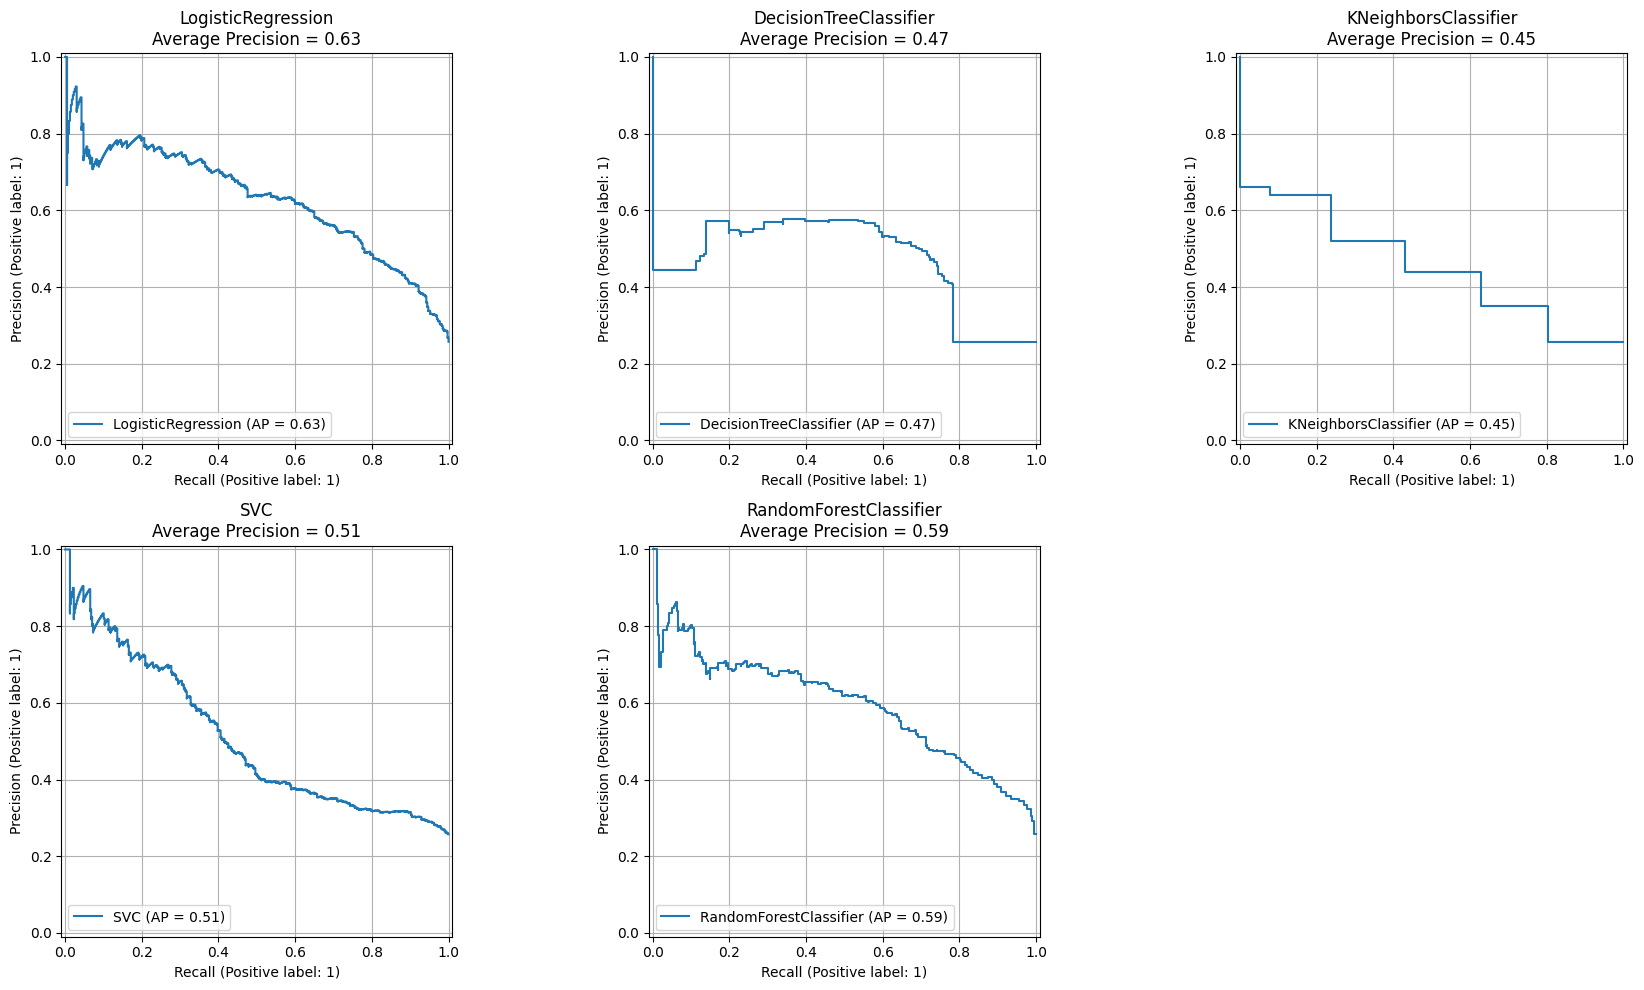

In [55]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(model_name):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(model, "predict_proba"):
        predict_probas = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, "decision_function"):
        predict_probas = model.decision_function(X_val)
    else:
        print(f"El modelo {name} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar Precision Recall
    PrecisionRecallDisplay.from_predictions(y_val, predict_probas, ax=ax, name=name)

    #AVG Precision
    avg_precision = average_precision_score(y_val, predict_probas)
    ax.set_title(f"{name}\nAverage Precision = {avg_precision:.2f}")
    ax.grid(True)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [56]:
for name, model in model_name:
    # Obtener probabilidades o scores continuos
    if hasattr(model, "predict_proba"):
        predict_probas = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, "decision_function"):
        predict_probas = model.decision_function(X_val)
    else:
        print(f" {name} no tiene método predict_proba ni decision_function.")
        continue

    #Impresión average precision score
    ap_score = average_precision_score(y_val, predict_probas)
    print(f"Score promedio Precisión-Recall ({name}): {ap_score:.3f}")

Score promedio Precisión-Recall (LogisticRegression): 0.628
Score promedio Precisión-Recall (DecisionTreeClassifier): 0.469
Score promedio Precisión-Recall (KNeighborsClassifier): 0.452
Score promedio Precisión-Recall (SVC): 0.508
Score promedio Precisión-Recall (RandomForestClassifier): 0.594


*Metricas*

In [57]:
from sklearn.metrics import classification_report
for name, model in model_name:
    print(f"\n Reporte de clasificación: {name}")
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred, digits=3))


 Reporte de clasificación: LogisticRegression
              precision    recall  f1-score   support

           0      0.841     0.901     0.870      1147
           1      0.639     0.509     0.567       397

    accuracy                          0.800      1544
   macro avg      0.740     0.705     0.718      1544
weighted avg      0.789     0.800     0.792      1544


 Reporte de clasificación: DecisionTreeClassifier
              precision    recall  f1-score   support

           0      0.847     0.858     0.852      1147
           1      0.573     0.552     0.562       397

    accuracy                          0.779      1544
   macro avg      0.710     0.705     0.707      1544
weighted avg      0.776     0.779     0.778      1544


 Reporte de clasificación: KNeighborsClassifier
              precision    recall  f1-score   support

           0      0.814     0.862     0.837      1147
           1      0.520     0.431     0.471       397

    accuracy                       

*Modelos a destacar*

LogisticRegression es el modelo más sólido

LogisticRegression



*   Precision 0.639  
*   recall 0.509,
*   f1_score 0.567


---
Entendiendo esto se puede agregar que este método. Uno de sus fuertes es predecir el abandono de clientes (caso de análisis), enfocandose en datos categóricos.








# *Validación Cruzada*

Logistic Regression

In [58]:
from sklearn.model_selection import KFold, cross_validate

In [59]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_result1 = cross_validate(modelo1, X, y, cv= kf)
print(f"El test_score es: {cv_result1['test_score']}")
average = cv_result1['test_score'].mean()
detour_std = cv_result1['test_score'].std()
print(f'El promedio de exactitud es de: {average}')
print(f'El desvio estandar de exactitud es de: {detour_std}')
print(f'El intervalo de confianza es de: {average-2*detour_std},{min(average+2*detour_std,1)}')


El test_score es: [0.79935275 0.78704453 0.79919028 0.80404858 0.8194332 ]
El promedio de exactitud es de: 0.801813869999869
El desvio estandar de exactitud es de: 0.010454743064798072
El intervalo de confianza es de: 0.780904383870273,0.8227233561294651


*DecisionTreeClassifier*

In [60]:
cv_result2 = cross_validate(modelo2, X, y, cv= kf)
print(f"El test_score es: {cv_result2['test_score']}")
average = cv_result2['test_score'].mean()
detour_std = cv_result2['test_score'].std()
print(f'El promedio de exactitud es de: {average}')
print(f'El desvio estandar de exactitud es de: {detour_std}')
print(f'El intervalo de confianza es de: {average-2*detour_std},{min(average+2*detour_std,1)}')

El test_score es: [0.76779935 0.74898785 0.76275304 0.77165992 0.76680162]
El promedio de exactitud es de: 0.7636003563801212
El desvio estandar de exactitud es de: 0.007836828124891107
El intervalo de confianza es de: 0.747926700130339,0.7792740126299035


*KNN*

In [61]:
cv_result3 = cross_validate(modelo3, X, y, cv= kf)
print(f"El test_score es: {cv_result3['test_score']}")
average = cv_result3['test_score'].mean()
detour_std = cv_result3['test_score'].std()
print(f'El promedio de exactitud es de: {average}')
print(f'El desvio estandar de exactitud es de: {detour_std}')
print(f'El intervalo de confianza es de: {average-2*detour_std},{min(average+2*detour_std,1)}')

El test_score es: [0.7710356  0.76032389 0.7708502  0.7562753  0.7708502 ]
El promedio de exactitud es de: 0.7658670387694404
El desvio estandar de exactitud es de: 0.006310400465693954
El intervalo de confianza es de: 0.7532462378380524,0.7784878397008284


*SVC*

In [62]:
cv_result4 = cross_validate(modelo4, X, y, cv= kf)
print(f"El test_score es: {cv_result4['test_score']}")
average = cv_result4['test_score'].mean()
detour_std = cv_result4['test_score'].std()
print(f'El promedio de exactitud es de: {average}')
print(f'El desvio estandar de exactitud es de: {detour_std}')
print(f'El intervalo de confianza es de: {average-2*detour_std},{min(average+2*detour_std,1)}')

El test_score es: [0.66504854 0.66963563 0.66558704 0.68178138 0.64615385]
El promedio de exactitud es de: 0.6656412876852325
El desvio estandar de exactitud es de: 0.011459248522816757
El intervalo de confianza es de: 0.6427227906395989,0.688559784730866


*Random Forest Classifier*

In [63]:
cv_result5 = cross_validate(modelo5, X, y, cv= kf)
print(f"El test_score es: {cv_result5['test_score']}")
average = cv_result5['test_score'].mean()
detour_std = cv_result5['test_score'].std()
print(f'El promedio de exactitud es de: {average}')
print(f'El desvio estandar de exactitud es de: {detour_std}')
print(f'El intervalo de confianza es de: {average-2*detour_std},{min(average+2*detour_std,1)}')

El test_score es: [0.802589   0.76761134 0.78785425 0.79271255 0.79352227]
El promedio de exactitud es de: 0.7888578803244106
El desvio estandar de exactitud es de: 0.011641146531123048
El intervalo de confianza es de: 0.7655755872621646,0.8121401733866567


De la data obtenida Logistic Regression tiene los mejores números. Aún así se realizará validación cruzada con sensibilidad

***Validación Cruzada con sensibilidad***


In [64]:
def interval_trust(result):
 average = result['test_score'].mean()
 detour_std = result['test_score'].std()
 return (f'{average-2*detour_std},{min(average+2*detour_std,1)}')

*Logistic Regression*

In [65]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_result1 = cross_validate(modelo1,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_result1['test_score']}")
print(interval_trust(cv_result1))

El test_score es: [0.48639456 0.49074074 0.48318043 0.53918495 0.54012346]
0.455885781774544,0.5599638728120985


*DecisionTreeClassifier*

In [66]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_result2 = cross_validate(modelo2,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_result2['test_score']}")
print(interval_trust(cv_result2))

El test_score es: [0.52380952 0.48765432 0.42507645 0.5830721  0.51234568]
0.40369994839291434,0.6090832822960425


*KNN*

In [67]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_result3 = cross_validate(modelo3,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_result3['test_score']}")
print(interval_trust(cv_result3))

El test_score es: [0.39795918 0.43209877 0.40366972 0.4169279  0.44444444]
0.3843671849776637,0.4536728222252064


*SVC*

In [68]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_result4 = cross_validate(modelo4,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_result4['test_score']}")
print(interval_trust(cv_result4))

El test_score es: [0.54761905 0.55864198 0.56880734 0.56426332 0.58950617]
0.5381246023616704,0.5934105408786294


*Random Forest Classifier*

In [69]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_result5 = cross_validate(modelo5,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_result5['test_score']}")
print(interval_trust(cv_result5))

El test_score es: [0.50340136 0.45987654 0.44954128 0.48589342 0.43518519]
0.41738716910170515,0.5161719470066343


Creando tabla

In [70]:
recall_avg=[
    cv_result1['test_score'].mean(),
    cv_result2['test_score'].mean(),
    cv_result3['test_score'].mean(),
    cv_result4['test_score'].mean(),
    cv_result5['test_score'].mean()
]
recall_avg = [f'{score:.4f}' for score in recall_avg]
print(recall_avg)


['0.5079', '0.5064', '0.4190', '0.5658', '0.4668']


In [71]:
all_interval_trust= [
    interval_trust(cv_result1),
    interval_trust(cv_result2),
    interval_trust(cv_result3),
    interval_trust(cv_result4),
    interval_trust(cv_result5)
]
formatted_intervals = []
for interval in all_interval_trust:
    start, end = interval.split(',')
    formatted_intervals.append(f'{float(start):.4f},{min(float(end),1):.4f}')

print(formatted_intervals)


['0.4559,0.5600', '0.4037,0.6091', '0.3844,0.4537', '0.5381,0.5934', '0.4174,0.5162']


In [72]:
table_model_kf_recall = {
    'Modelo':[
       'Modelo1',
       'Modelo2',
       'Modelo3',
       'Modelo4',
       'Modelo5'
    ],
    'recall_average': recall_avg,
    'interval_trust': formatted_intervals
}
df_kf_recall = pd.DataFrame(table_model_kf_recall)
df_kf_recall


,Modelo,recall_average,interval_trust
0,Modelo1,0.5079,"0.4559,0.5600"
1,Modelo2,0.5064,"0.4037,0.6091"
2,Modelo3,0.4190,"0.3844,0.4537"
3,Modelo4,0.5658,"0.5381,0.5934"
4,Modelo5,0.4668,"0.4174,0.5162"


# *Estratificación de datos*

In [73]:
from sklearn.model_selection import StratifiedKFold

*Logistic Regression*

In [74]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result1 = cross_validate(modelo1,X,y,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result1['test_score']}")
print(interval_trust(cv_result1))

El test_score es: [0.47169811 0.47003155 0.54258675 0.49056604 0.53773585]
0.4393167859078468,0.5657305327041405


*DecisionTreeClassifier*

In [75]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result2 = cross_validate(modelo2,X,y,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result2['test_score']}")
print(interval_trust(cv_result2))

El test_score es: [0.48427673 0.54258675 0.58990536 0.48113208 0.48742138]
0.43126437678793206,0.6028645441096334


*KNN*

In [76]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result3 = cross_validate(modelo3,X,y,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result3['test_score']}")
print(interval_trust(cv_result3))

El test_score es: [0.42767296 0.37223975 0.49211356 0.40880503 0.41194969]
0.3440820161474486,0.501030377956077


*SVC*

In [77]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result4 = cross_validate(modelo4,X,y,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result4['test_score']}")
print(interval_trust(cv_result4))

El test_score es: [0.56289308 0.5362776  0.66246057 0.49371069 0.55345912]
0.45043778448546445,0.6730826408860412


*Random Forest Classifier*

In [78]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result5 = cross_validate(modelo5,X,y,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result5['test_score']}")
print(interval_trust(cv_result5))

El test_score es: [0.45597484 0.44164038 0.50788644 0.44339623 0.49371069]
0.414149764936532,0.522893665018034


Creando Tabla

In [79]:
recall_avg_skf=[
    cv_result1['test_score'].mean(),
    cv_result2['test_score'].mean(),
    cv_result3['test_score'].mean(),
    cv_result4['test_score'].mean(),
    cv_result5['test_score'].mean()
]
recall_avg_skf = [f'{score:.4f}' for score in recall_avg_skf]
print(recall_avg_skf)

['0.5025', '0.5171', '0.4226', '0.5618', '0.4685']


In [80]:
all_interval_trust_skf= [
    interval_trust(cv_result1),
    interval_trust(cv_result2),
    interval_trust(cv_result3),
    interval_trust(cv_result4),
    interval_trust(cv_result5)
]
formatted_intervals_skf = []
for interval in all_interval_trust_skf:
    start, end = interval.split(',')
    formatted_intervals_skf.append(f'{float(start):.4f},{min(float(end),1):.4f}')
print(formatted_intervals_skf)


['0.4393,0.5657', '0.4313,0.6029', '0.3441,0.5010', '0.4504,0.6731', '0.4141,0.5229']


In [81]:
table_model_skf_recall = {
    'Modelo':[
       'Modelo1',
       'Modelo2',
       'Modelo3',
       'Modelo4',
       'Modelo5'
    ],
    'recall_average': recall_avg_skf,
    'interval_trust': formatted_intervals_skf
}
df_skf_recall = pd.DataFrame(table_model_skf_recall)
df_skf_recall

,Modelo,recall_average,interval_trust
0,Modelo1,0.5025,"0.4393,0.5657"
1,Modelo2,0.5171,"0.4313,0.6029"
2,Modelo3,0.4226,"0.3441,0.5010"
3,Modelo4,0.5618,"0.4504,0.6731"
4,Modelo5,0.4685,"0.4141,0.5229"


# *Balanceo de datos: Oversampling*

In [82]:
archivo['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


In [83]:
archivo['Churn'].value_counts(normalize = True)

,proportion
Churn,
0,0.74281
1,0.25719


In [84]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_balanced, y_balanced = oversampling.fit_resample(X, y)
y_balanced.value_counts(normalize = True)

,proportion
Churn,
0,0.5
1,0.5


*Logistic Regression*

In [85]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result1 = cross_validate(modelo1,X_balanced,y_balanced,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result1['test_score']}")
print(interval_trust(cv_result1))

El test_score es: [0.81590414 0.86695747 0.86041439 0.81808279 0.82135076]
0.7918883153438965,0.8811955068194051


*DecisionTreeClassifier*

In [86]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result2 = cross_validate(modelo2,X_balanced,y_balanced,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result2['test_score']}")
print(interval_trust(cv_result2))

El test_score es: [0.83442266 0.87022901 0.84514722 0.83877996 0.83660131]
0.8188425166385902,0.871229542719504


*KNN*

In [87]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result3 = cross_validate(modelo3,X_balanced,y_balanced,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result3['test_score']}")
print(interval_trust(cv_result3))

El test_score es: [0.82026144 0.85059978 0.83860414 0.83006536 0.84858388]
0.814853781011753,0.8603920594788111


*SVC*

In [88]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result4 = cross_validate(modelo4,X_balanced,y_balanced,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result4['test_score']}")
print(interval_trust(cv_result4))

El test_score es: [0.58714597 0.6346783  0.60959651 0.56862745 0.60021786]
0.5558340044940345,0.644272433331308


*Random Forest Classifier*

In [89]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_result5 = cross_validate(modelo5,X_balanced,y_balanced,cv=skf, scoring='recall')
print(f"El test_score es: {cv_result5['test_score']}")
print(interval_trust(cv_result5))

El test_score es: [0.84313725 0.86259542 0.86259542 0.85947712 0.83986928]
0.833648095635847,0.8734217042943031


Tabla

In [90]:
recall_avg_skf_balanced=[
    cv_result1['test_score'].mean(),
    cv_result2['test_score'].mean(),
    cv_result3['test_score'].mean(),
    cv_result4['test_score'].mean(),
    cv_result5['test_score'].mean()
]
recall_avg_skf_balanced = [f'{score:.4f}' for score in recall_avg_skf_balanced]
print(recall_avg_skf_balanced)

['0.8365', '0.8450', '0.8376', '0.6001', '0.8535']


In [91]:
all_interval_trust_skf_balanced= [
    interval_trust(cv_result1),
    interval_trust(cv_result2),
    interval_trust(cv_result3),
    interval_trust(cv_result4),
    interval_trust(cv_result5)
]
formatted_intervals_skf_balanced = []
for interval in all_interval_trust_skf_balanced:
    start, end = interval.split(',')
    formatted_intervals_skf_balanced.append(f'{float(start):.4f},{min(float(end),1):.4f}')
print(formatted_intervals_skf_balanced)

['0.7919,0.8812', '0.8188,0.8712', '0.8149,0.8604', '0.5558,0.6443', '0.8336,0.8734']


In [92]:
table_model_skf_recall_balanced = {
    'Modelo':[
       'Modelo1',
       'Modelo2',
       'Modelo3',
       'Modelo4',
       'Modelo5'
    ],
    'recall_average': recall_avg_skf_balanced,
    'interval_trust': formatted_intervals_skf_balanced
}
df_skf_recall_balanced = pd.DataFrame(table_model_skf_recall_balanced)
df_skf_recall_balanced

,Modelo,recall_average,interval_trust
0,Modelo1,0.8365,"0.7919,0.8812"
1,Modelo2,0.8450,"0.8188,0.8712"
2,Modelo3,0.8376,"0.8149,0.8604"
3,Modelo4,0.6001,"0.5558,0.6443"
4,Modelo5,0.8535,"0.8336,0.8734"


# *Pipeline*

In [93]:
from imblearn.pipeline import Pipeline as imbpipeline



*Logistic Regression*

In [94]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_result1 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
interval_trust(cv_result1)

'0.6208050208044802,0.7557043139573396'

*DecisionTreeClassifier*

In [95]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('tree',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_result2 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
interval_trust(cv_result2)

'0.5302059064860888,0.7556778702732311'

*KNN*

In [96]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_result3 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
interval_trust(cv_result3)

'0.5810830284437373,0.6896945046396109'

SVC

In [97]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('SVC',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_result4 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
interval_trust(cv_result4)

'0.4712056608901062,0.7153030786690472'

*Random Forest Classifier*

In [98]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('random_forest',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_result5 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
interval_trust(cv_result5)

'0.5022716226185497,0.6639565780837895'

Tabla

In [99]:
all_interval_trust_oversampling_pipeline= [
    interval_trust(cv_result1),
    interval_trust(cv_result2),
    interval_trust(cv_result3),
    interval_trust(cv_result4),
    interval_trust(cv_result5)
]
formatted_intervals_oversampling_pipeline = []
for interval in all_interval_trust_oversampling_pipeline:
    start, end = interval.split(',')
    formatted_intervals_oversampling_pipeline.append(f'{float(start):.4f},{min(float(end),1):.4f}')
print(formatted_intervals_oversampling_pipeline)

['0.6208,0.7557', '0.5302,0.7557', '0.5811,0.6897', '0.4712,0.7153', '0.5023,0.6640']


In [100]:
table_recall_oversampling_pipeline = {
    'Modelo':[
        'Logistic Regression',
        'DecisionTreeClassifier',
        'KNN',
        'SVC',
        'Random Forest Classifier'
    ],
    'interval trust': formatted_intervals_oversampling_pipeline,
    'interval trust(AVG)': [0.6845, 0.6518, 0.6543, 0.6046, 0.5743]
}
df_recall_oversampling_pipeline = pd.DataFrame(table_recall_oversampling_pipeline)
df_recall_oversampling_pipeline

,Modelo,interval trust,interval trust(AVG)
0,Logistic Regression,"0.6208,0.7557",0.6845
1,DecisionTreeClassifier,"0.5302,0.7557",0.6518
2,KNN,"0.5811,0.6897",0.6543
3,SVC,"0.4712,0.7153",0.6046
4,Random Forest Classifier,"0.5023,0.6640",0.5743


# *Probando en todos los Modelos*

In [101]:
from imblearn.under_sampling import NearMiss

In [102]:
undersample = NearMiss(version=3)
X_balanced, y_balanced = undersample.fit_resample(X,y)

*Logistic Regression*

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       810
           1       0.48      0.73      0.58       281

    accuracy                           0.73      1091
   macro avg       0.68      0.73      0.69      1091
weighted avg       0.78      0.73      0.74      1091



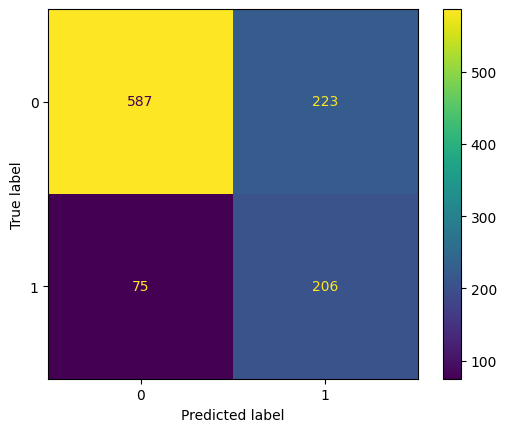

In [103]:
modelo1.fit(X_balanced,y_balanced)
y_previst = modelo1.predict(X_test)
print(classification_report(y_test,y_previst))
ConfusionMatrixDisplay.from_predictions(y_test,y_previst);

*DecisionTreeClassifier*

              precision    recall  f1-score   support

           0       0.84      0.65      0.73       810
           1       0.39      0.65      0.49       281

    accuracy                           0.65      1091
   macro avg       0.62      0.65      0.61      1091
weighted avg       0.73      0.65      0.67      1091



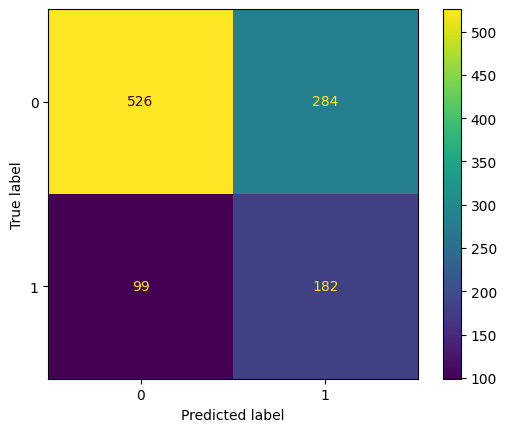

In [104]:
modelo2.fit(X_balanced,y_balanced)
y_previst = modelo2.predict(X_test)
print(classification_report(y_test,y_previst))
ConfusionMatrixDisplay.from_predictions(y_test,y_previst);

*KNN*

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       810
           1       0.44      0.51      0.47       281

    accuracy                           0.70      1091
   macro avg       0.63      0.64      0.63      1091
weighted avg       0.72      0.70      0.71      1091



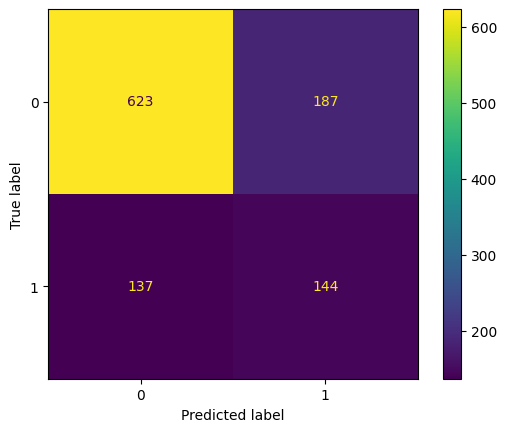

In [105]:
modelo3.fit(X_balanced,y_balanced)
y_previst = modelo3.predict(X_test)
print(classification_report(y_test,y_previst))
ConfusionMatrixDisplay.from_predictions(y_test,y_previst);

*SVC*

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       810
           1       0.38      0.51      0.43       281

    accuracy                           0.66      1091
   macro avg       0.59      0.61      0.59      1091
weighted avg       0.70      0.66      0.67      1091



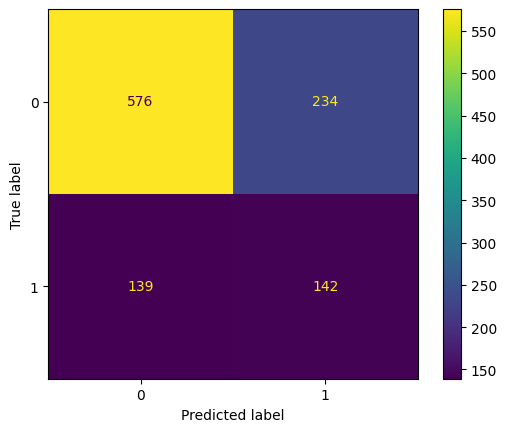

In [106]:
modelo4.fit(X_balanced,y_balanced)
y_previst = modelo4.predict(X_test)
print(classification_report(y_test,y_previst))
ConfusionMatrixDisplay.from_predictions(y_test,y_previst);

*Random Forest Classifier*

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       810
           1       0.49      0.63      0.55       281

    accuracy                           0.73      1091
   macro avg       0.67      0.70      0.68      1091
weighted avg       0.76      0.73      0.74      1091



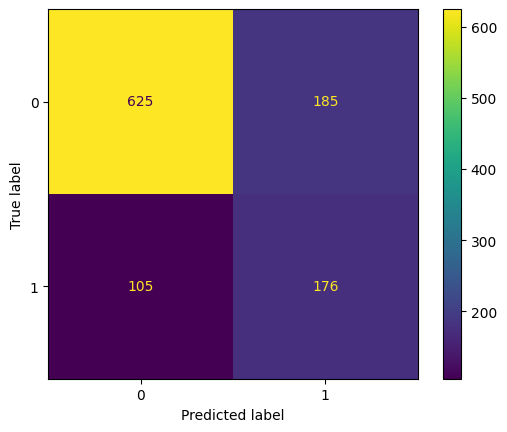

In [107]:
modelo5.fit(X_balanced,y_balanced)
y_previst = modelo5.predict(X_test)
print(classification_report(y_test,y_previst))
ConfusionMatrixDisplay.from_predictions(y_test,y_previst);

***Crear Tabla***


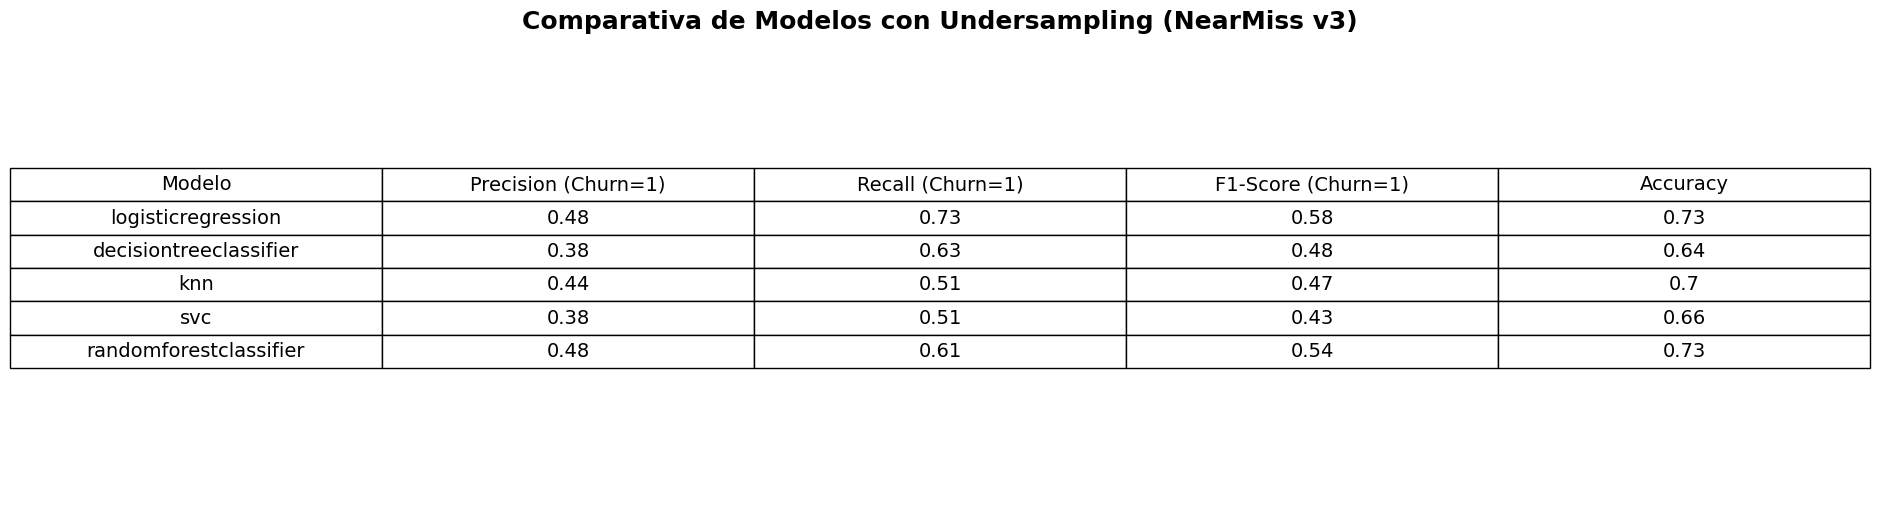

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear la tabla de resultados
data = {
    'Modelo': ['logisticregression', 'decisiontreeclassifier', 'knn', 'svc', 'randomforestclassifier'],
    'Precision (Churn=1)': [0.48, 0.38, 0.44, 0.38, 0.48],
    'Recall (Churn=1)':    [0.73, 0.63, 0.51, 0.51, 0.61],
    'F1-Score (Churn=1)':  [0.58, 0.48, 0.47, 0.43, 0.54],
    'Accuracy':            [0.73, 0.64, 0.70, 0.66, 0.73]
}

df = pd.DataFrame(data)

# Mostrar tabla con tamaño de fuente grande
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
tabla = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(14)
tabla.scale(2, 2)  # ancho x alto de las celdas

plt.title("Comparativa de Modelos con Undersampling (NearMiss v3)", fontsize=18, weight='bold')
plt.show()

Logistic Regression sigue teniendo las mejores métricas.

---

Por ende es el modelo a utilizar de manera definitiva.

# *Hiperparámetros*

In [109]:
len(archivo.columns)

20

In [110]:
import numpy as np
import pandas as pd

coefs = modelo1.coef_[0]
data_columns = X.columns
#Identidicando que tablas tienen un mayor porcentaje de importancia.
table = pd.DataFrame({
    'Variable': data_columns,
    'Coeficiente': coefs,
    'Odds Ratio': np.exp(coefs),
    'Importancia absoluta': np.abs(coefs)
}).sort_values(by='Importancia absoluta', ascending=False)

table.head(10)

,Variable,Coeficiente,Odds Ratio,Importancia absoluta
11,internet_TechSupport,-0.637222,0.528759,0.637222
8,internet_OnlineSecurity,-0.597334,0.550277,0.597334
15,account_PaperlessBilling,0.512584,1.669599,0.512584
14,account_Contract,-0.333152,0.716661,0.333152
1,customer_SeniorCitizen,0.291572,1.338530,0.291572
9,internet_OnlineBackup,-0.290337,0.748011,0.290337
7,internet_InternetService,0.275618,1.317344,0.275618
3,customer_Dependents,-0.208667,0.811666,0.208667
16,account_PaymentMethod,-0.153130,0.858018,0.153130
5,phone_PhoneService,-0.088763,0.915062,0.088763


# *Creación del Módelo definitivo*

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

#Despúes del análisis previo el Modelo 1 se usará en "producción"
modelo1 = LogisticRegression(solver='liblinear',random_state=42)

# Pipeline con NearMiss y modelo
pipeline = imbpipeline([
    ('undersample', NearMiss(version=3)),
    ('logistic', modelo1)
])

# Grid de hiperparámetros
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# GridSearchCV optimizando recall
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid.fit(X, y)

# Resultados
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor recall promedio:", grid.best_score_)

# Guardar modelo optimizado
import joblib
joblib.dump(grid.best_estimator_, 'champion.pkl')

Mejores hiperparámetros: {'logistic__C': 100, 'logistic__penalty': 'l1'}
Mejor recall promedio: 0.7512747257107713


['champion.pkl']

# *Recomendaciones Finales*

**Métodos de Pagos Automatizado** :Buscar la reducción de cancelación. Ayudaría un descuento adicional para una mayor afiliación.


---
**Indentificar Mejores Clientes (Más Pagan)**: Tenerles en alta estima, y que esten a la vanguardia de todos los servicios(Lo mejor)

---

**Robusto Servicio al Cliente**: Identificar rápidamente y solucionarlo. En caso que el problema sea persistente, adicionar algún servicio por un tiempo específico


---
**Campañas enfocadas a los clientes con mayor deserción**: Buscar fidelización de clientes más díficiles con ofertas atractivas. Primer año con un pago inferior al valor real del servicio.


---
**Cliente Nuevo**: Fidelización en los primeros meses para reducir su posible deserción.

---



